# RedCarpetUp Task

## Data Selection

In [240]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

**NOTE : To use nsepy, please install the nsepy package onto your PC. i.e $ pip install nsepy**

In [244]:
from nsepy import get_history
infy = get_history(symbol='MCX',start=date(2015,1,1),end = date(2016,12,31))
tcs = get_history(symbol='TCS',start=date(2015,1,1),end = date(2016,12,31))
nifty_IT = get_history(symbol='NIFTY IT',start=date(2015,1,1),end = date(2016,12,31),index = True)

**NOTE** : <br>
The above code requires an internet connection to load the csv data. <br>
There is some problem with the INFY file online. It doesn't extracts sometimes. So, I have extracted the stock data of MCX instead. <br>
The csv data has already been downloaded by me and is commented using the code below.

In [245]:
#infy = pd.read_csv('infy_stock.csv', parse_dates=['Date'])
#tcs = pd.read_csv('tcs_stock.csv', parse_dates=['Date'])
#nifty_IT = pd.read_csv('nifty_it_index.csv', parse_dates=['Date'])

In [246]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,MCX,EQ,841.75,841.75,922.80,840.3,920.0,908.85,894.88,1940176,1.736227e+14,42606,418960,0.2159
2015-01-02,MCX,EQ,908.85,921.00,926.80,871.5,876.5,876.05,891.34,1729553,1.541613e+14,44258,583328,0.3373
2015-01-05,MCX,EQ,876.05,878.70,887.80,866.1,871.2,872.15,877.67,428965,3.764916e+13,14044,130523,0.3043
2015-01-06,MCX,EQ,872.15,863.00,867.25,843.0,856.0,853.20,855.19,402909,3.445628e+13,11028,179228,0.4448
2015-01-07,MCX,EQ,853.20,855.05,877.00,840.1,854.0,855.00,858.42,544622,4.675145e+13,18557,193827,0.3559


The INFY stock prices data has been loaded into the variable 'infy'

In [247]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


NIFT IT indexes are loaded into the variable nifty_IT

In [248]:
nifty_IT.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


TCS stocks data loaded into the variable tcs

## Part 1: Time Series Analysis

### Rolling averages

In [249]:
type(infy.index),type(tcs.index),type(nifty_IT.index)

(pandas.core.indexes.base.Index,
 pandas.core.indexes.base.Index,
 pandas.core.indexes.base.Index)

The dataframes are not Datetime Indexed. Therefore we need to DateTime Index the dataframes

In [250]:
infy.index = pd.to_datetime(infy.index)
tcs.index = pd.to_datetime(tcs.index)
nifty_IT.index = pd.to_datetime(nifty_IT.index)

type(infy.index),type(tcs.index),type(nifty_IT.index)

(pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [251]:
from datetime import timedelta
def rollingAvg(df):
    window = np.arange(4,53,12)
    series = df.Close
    df_new = pd.DataFrame(index=df.index,columns=list(window))
    for i in window:
        df_new[i] = series.rolling(window=timedelta(weeks=int(i))).mean()
    df_new.columns.name = 'Rolling window size'
    return df_new

**In the function above, I create a k-moving average function where k = 4,16,...52. I put all these individual moving averages Series into a single Dataframe**

In [252]:
tcs_df = rollingAvg(tcs)
tcs_df.head()

Rolling window size,4,16,28,40,52
Date,,,,,
2015-01-01,2545.550000,2545.550000,2545.550000,2545.550000,2545.550000
2015-01-02,2562.500000,2562.500000,2562.500000,2562.500000,2562.500000
2015-01-05,2555.083333,2555.083333,2555.083333,2555.083333,2555.083333
2015-01-06,2527.962500,2527.962500,2527.962500,2527.962500,2527.962500
2015-01-07,2505.910000,2505.910000,2505.910000,2505.910000,2505.910000


In [253]:
infy_df = rollingAvg(infy)
infy_df.head()

Rolling window size,4,16,28,40,52
Date,,,,,
2015-01-01,908.850000,908.850000,908.850000,908.850000,908.850000
2015-01-02,892.450000,892.450000,892.450000,892.450000,892.450000
2015-01-05,885.683333,885.683333,885.683333,885.683333,885.683333
2015-01-06,877.562500,877.562500,877.562500,877.562500,877.562500
2015-01-07,873.050000,873.050000,873.050000,873.050000,873.050000


In [254]:
nifty_df = rollingAvg(nifty_IT)
nifty_df.head()

Rolling window size,4,16,28,40,52
Date,,,,,
2015-01-01,11215.700000,11215.700000,11215.700000,11215.700000,11215.700000
2015-01-02,11293.900000,11293.900000,11293.900000,11293.900000,11293.900000
2015-01-05,11278.783333,11278.783333,11278.783333,11278.783333,11278.783333
2015-01-06,11199.062500,11199.062500,11199.062500,11199.062500,11199.062500
2015-01-07,11142.450000,11142.450000,11142.450000,11142.450000,11142.450000


### Additional: Plotting the different k-moving averages (k=4,16,...52) for comparision

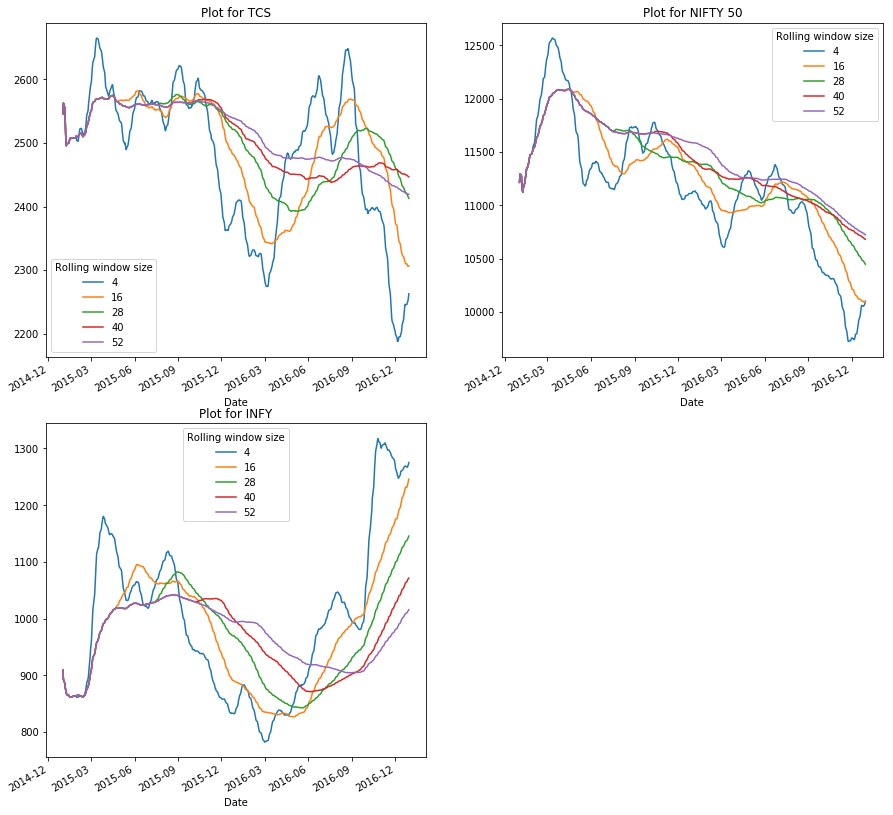

In [255]:
fig = plt.figure(figsize=(15,15))
df_list = [tcs_df,nifty_df,infy_df]
plot_titles = ['Plot for TCS','Plot for NIFTY 50','Plot for INFY']
for i in range(3):
    ax = fig.add_subplot(2,2,i+1)
    df_list[i].plot(ax=ax,title=plot_titles[i])

### Conclusion: We observe that as the window size of the moving average increases, the time-series plot gets more and more noise-free

## Calculating Shocks

### 1. Volume shock

In [256]:
def volumeShock(df):
    volume_arr = np.array(df.Volume)
    volume_prev = np.roll(volume_arr,1) #Shift the array by 1 position ahead
    volume_prev[0] = 0 #The first element is nullified
    
    volume_diff = volume_arr - volume_prev
    
    volume_shock_np = ((volume_diff/volume_arr)>0.1).astype(int)
    
    volume_shock = pd.Series(volume_shock_np,index=df.index)
    return volume_shock

In the function volumeShock above, I have done the computaion in numpy than in Series as the computations in numpy are faster.

In [257]:
volumeShock(infy)

Date
2015-01-01    1
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    1
2015-01-08    0
2015-01-09    0
2015-01-12    1
2015-01-13    0
2015-01-14    0
2015-01-15    1
2015-01-16    0
2015-01-19    0
2015-01-20    1
2015-01-21    0
2015-01-22    0
2015-01-23    1
2015-01-27    0
2015-01-28    1
2015-01-29    1
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    1
2015-02-06    0
2015-02-09    0
2015-02-10    1
2015-02-11    0
2015-02-12    1
             ..
2016-11-21    1
2016-11-22    0
2016-11-23    0
2016-11-24    0
2016-11-25    0
2016-11-28    1
2016-11-29    0
2016-11-30    1
2016-12-01    0
2016-12-02    1
2016-12-05    0
2016-12-06    1
2016-12-07    0
2016-12-08    0
2016-12-09    1
2016-12-12    0
2016-12-13    0
2016-12-14    0
2016-12-15    1
2016-12-16    0
2016-12-19    0
2016-12-20    0
2016-12-21    0
2016-12-22    1
2016-12-23    0
2016-12-26    0
2016-12-27    0
2016-12-28    1
2016-12-29    1
2016-12-30    0
Length: 495, dtype:

In [258]:
volumeShock(tcs)

Date
2015-01-01    1
2015-01-02    1
2015-01-05    1
2015-01-06    1
2015-01-07    0
2015-01-08    0
2015-01-09    1
2015-01-12    0
2015-01-13    0
2015-01-14    1
2015-01-15    1
2015-01-16    0
2015-01-19    0
2015-01-20    1
2015-01-21    1
2015-01-22    0
2015-01-23    1
2015-01-27    0
2015-01-28    1
2015-01-29    1
2015-01-30    1
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    1
2015-02-06    0
2015-02-09    0
2015-02-10    1
2015-02-11    0
2015-02-12    0
             ..
2016-11-21    0
2016-11-22    0
2016-11-23    0
2016-11-24    1
2016-11-25    1
2016-11-28    0
2016-11-29    0
2016-11-30    1
2016-12-01    0
2016-12-02    1
2016-12-05    1
2016-12-06    0
2016-12-07    1
2016-12-08    1
2016-12-09    0
2016-12-12    0
2016-12-13    1
2016-12-14    0
2016-12-15    1
2016-12-16    0
2016-12-19    0
2016-12-20    1
2016-12-21    0
2016-12-22    0
2016-12-23    0
2016-12-26    0
2016-12-27    1
2016-12-28    0
2016-12-29    1
2016-12-30    0
Length: 495, dtype:

In [259]:
volumeShock(nifty_IT)

Date
2015-01-01    1
2015-01-02    1
2015-01-05    0
2015-01-06    1
2015-01-07    0
2015-01-08    1
2015-01-09    1
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    0
2015-01-21    1
2015-01-22    0
2015-01-23    1
2015-01-27    0
2015-01-28    0
2015-01-29    0
2015-01-30    1
2015-02-02    0
2015-02-03    1
2015-02-04    0
2015-02-05    0
2015-02-06    0
2015-02-09    0
2015-02-10    1
2015-02-11    0
2015-02-12    1
             ..
2016-11-21    1
2016-11-22    0
2016-11-23    0
2016-11-24    1
2016-11-25    1
2016-11-28    0
2016-11-29    0
2016-11-30    1
2016-12-01    0
2016-12-02    0
2016-12-05    0
2016-12-06    0
2016-12-07    1
2016-12-08    1
2016-12-09    1
2016-12-12    0
2016-12-13    1
2016-12-14    1
2016-12-15    1
2016-12-16    0
2016-12-19    0
2016-12-20    1
2016-12-21    0
2016-12-22    0
2016-12-23    0
2016-12-26    0
2016-12-27    1
2016-12-28    1
2016-12-29    1
2016-12-30    0
Length: 495, dtype:

### 2. Price Shocks / Price Black Swan

In [260]:
def pricingShock(df):
    pricing_arr = np.array(df.Close)
    pricing_next = np.roll(pricing_arr,-1) #Shift the array by 1 position behind
    pricing_next[-1] = 0 #The last element is nullified
    
    pricing_diff = pricing_next - pricing_arr
    
    pricing_shock_np = ((pricing_diff/pricing_arr)>0.02).astype(int)
    
    pricing_shock = pd.Series(pricing_shock_np,index=df.index)
    return pricing_shock

**Pricing Shock : Based on the difference of (T+1)th closing price and (T)th closing price**

In [261]:
pricingShock(infy)

Date
2015-01-01    0
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    0
2015-01-08    0
2015-01-09    1
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    0
2015-01-21    0
2015-01-22    0
2015-01-23    0
2015-01-27    0
2015-01-28    1
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    0
2015-02-06    0
2015-02-09    0
2015-02-10    0
2015-02-11    0
2015-02-12    0
             ..
2016-11-21    0
2016-11-22    0
2016-11-23    0
2016-11-24    0
2016-11-25    0
2016-11-28    0
2016-11-29    0
2016-11-30    0
2016-12-01    0
2016-12-02    0
2016-12-05    1
2016-12-06    1
2016-12-07    1
2016-12-08    1
2016-12-09    0
2016-12-12    0
2016-12-13    0
2016-12-14    0
2016-12-15    0
2016-12-16    0
2016-12-19    0
2016-12-20    0
2016-12-21    0
2016-12-22    0
2016-12-23    0
2016-12-26    0
2016-12-27    1
2016-12-28    0
2016-12-29    0
2016-12-30    0
Length: 495, dtype:

In [262]:
pricingShock(tcs)

Date
2015-01-01    0
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    0
2015-01-08    1
2015-01-09    0
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    0
2015-01-21    0
2015-01-22    0
2015-01-23    0
2015-01-27    0
2015-01-28    0
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    0
2015-02-06    0
2015-02-09    0
2015-02-10    0
2015-02-11    0
2015-02-12    1
             ..
2016-11-21    0
2016-11-22    0
2016-11-23    0
2016-11-24    1
2016-11-25    0
2016-11-28    0
2016-11-29    0
2016-11-30    0
2016-12-01    0
2016-12-02    0
2016-12-05    0
2016-12-06    0
2016-12-07    0
2016-12-08    0
2016-12-09    0
2016-12-12    0
2016-12-13    0
2016-12-14    1
2016-12-15    0
2016-12-16    0
2016-12-19    1
2016-12-20    0
2016-12-21    0
2016-12-22    0
2016-12-23    0
2016-12-26    0
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
Length: 495, dtype:

In [263]:
pricingShock(nifty_IT)

Date
2015-01-01    0
2015-01-02    0
2015-01-05    0
2015-01-06    0
2015-01-07    0
2015-01-08    1
2015-01-09    0
2015-01-12    0
2015-01-13    0
2015-01-14    0
2015-01-15    0
2015-01-16    0
2015-01-19    0
2015-01-20    0
2015-01-21    0
2015-01-22    0
2015-01-23    0
2015-01-27    0
2015-01-28    0
2015-01-29    0
2015-01-30    0
2015-02-02    0
2015-02-03    0
2015-02-04    0
2015-02-05    0
2015-02-06    0
2015-02-09    0
2015-02-10    0
2015-02-11    0
2015-02-12    0
             ..
2016-11-21    0
2016-11-22    0
2016-11-23    0
2016-11-24    1
2016-11-25    0
2016-11-28    0
2016-11-29    0
2016-11-30    0
2016-12-01    0
2016-12-02    0
2016-12-05    0
2016-12-06    0
2016-12-07    0
2016-12-08    0
2016-12-09    0
2016-12-12    0
2016-12-13    0
2016-12-14    0
2016-12-15    0
2016-12-16    0
2016-12-19    0
2016-12-20    0
2016-12-21    0
2016-12-22    0
2016-12-23    0
2016-12-26    0
2016-12-27    0
2016-12-28    0
2016-12-29    0
2016-12-30    0
Length: 495, dtype:

## 3. Pricing shock without Volume shock

**NOTE : <br>
The definition of the pricing without volume shock was unclear in the question, therefore I have assumed it as follow: <br>
To find those days when pricing shock is 1 but Volume shock is 0**

In [264]:
def priceVol(df):
    pricing_shock = np.array(pricingShock(df))
    volume_shock = np.array(volumeShock(df))
    
    priceVol = df.index[np.where((pricing_shock==1) & (volume_shock==0))]
    
    return priceVol

In [265]:
priceVol(infy)

DatetimeIndex(['2015-01-09', '2015-02-20', '2015-02-24', '2015-02-27',
               '2015-03-20', '2015-04-09', '2015-05-12', '2015-05-14',
               '2015-05-20', '2015-05-28', '2015-06-15', '2015-06-22',
               '2015-06-30', '2015-07-03', '2015-08-04', '2015-08-13',
               '2015-08-26', '2015-09-02', '2015-09-07', '2015-11-10',
               '2015-12-21', '2015-12-30', '2016-02-19', '2016-03-03',
               '2016-03-09', '2016-03-11', '2016-04-12', '2016-05-04',
               '2016-05-20', '2016-06-13', '2016-06-27', '2016-07-05',
               '2016-07-19', '2016-07-21', '2016-07-26', '2016-09-12',
               '2016-09-19', '2016-09-21', '2016-09-23', '2016-09-28',
               '2016-11-15', '2016-12-05', '2016-12-07', '2016-12-08',
               '2016-12-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [266]:
priceVol(tcs)

DatetimeIndex(['2015-01-08', '2015-02-12', '2015-05-06', '2015-05-21',
               '2015-08-13', '2015-08-17', '2015-09-01', '2015-09-30',
               '2015-10-01', '2016-03-02', '2016-04-08', '2016-05-24',
               '2016-05-27', '2016-06-29', '2016-07-29', '2016-08-22',
               '2016-12-14', '2016-12-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [267]:
priceVol(nifty_IT)

DatetimeIndex(['2015-07-20', '2015-09-23', '2016-03-01', '2016-04-08',
               '2016-05-24', '2016-07-29', '2016-10-17'],
              dtype='datetime64[ns]', name='Date', freq=None)

# Part 2 : Visualization

### Bokeh Visualization

In [268]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
import warnings
warnings.filterwarnings('ignore')

In [269]:
output_notebook()

Loading BokehJS ...

In [270]:
infy.name = 'INFY'
tcs.name = 'TCS'
nifty_IT.name = 'NIFTY IT'
def bokeh_plotting(df):
    TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
    p = figure(title="Closing Price for {}".format(df.name), y_axis_type="linear", plot_height = 400,tools = TOOLS, plot_width = 800)
    p.xaxis.axis_label = 'Time'
    p.yaxis.axis_label = 'Closing Price'
    
    
    #Marking the volumeless price movement with black
    p.circle(priceVol(df),df.Close[priceVol(df)], size = 10, color = 'k')

    p.line(df.index,df.Close,line_color="blue", line_width = 3)
    p.select_one(HoverTool).tooltips = [('time', '@x'),('Closing Price', '@y')]
    show(p)

In [271]:
output_file("bokeh_plotting.html", title="Data Visualization")
bokeh_plotting(infy)
bokeh_plotting(tcs)
bokeh_plotting(nifty_IT)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='568e632d-c107-49d7-a99c-e7f9c41364f0', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

In [272]:
bokeh_plotting(tcs)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7967b316-4ec3-4a40-82be-552333458fdf', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

In [273]:
bokeh_plotting(nifty_IT)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='f829cd86-4970-4c4c-a610-fe0777ac6bd9', ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

### Autocorrelation Plot

In [274]:
from statsmodels.tsa.stattools import acf, pacf

def draw_pacf(df):
    
    lags = 50

    x = list(range(lags))

    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(df.name))

    partial_autocorr = pacf(df.Close, nlags=lags)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    show(p)

In [275]:
output_file("PACF.html")

draw_pacf(infy)
draw_pacf(tcs)
draw_pacf(nifty_IT)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='036f0949-a089-4de0-8f33-f4636db3e6e1', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='7dde578f-36c0-496d-847a-327e75827b2b', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='b0c4e087-d062-4f9a-a442-20fdf66eff7a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='8a332173-ff19-4fc7-a301-1388d640c612', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: GlyphRenderer(id='0dccaf0e-b525-4386-9b88-986f8212ef5f', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: k [renderer: G